# Callibration of simple energy cost models with original MFSP calculations

## Load and process complex models

In [1]:
%matplotlib widget
from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_bottom_up,
    models_energy_without_fuel_effect,
    models_offset,
    models_climate_simple_gwpstar,
    models_sustainability,
    models_energy_cost_complex,
    models_energy_cost_simple,
)

In [2]:
models = {
    "models_traffic": models_traffic,
    "models_efficiency_bottom_up": models_efficiency_bottom_up,
    "models_energy_without_fuel_effect": models_energy_without_fuel_effect,
    "models_offset": models_offset,
    "models_climate_simple_gwpstar": models_climate_simple_gwpstar,
    "models_sustainability": models_sustainability,
    "models_energy_cost_complex": models_energy_cost_complex,
}

from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.fleet_model import (
    Fleet,
    AircraftParameters,
    Aircraft,
)

In [3]:
process = create_process(
    models=models,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

## Set up variables

A scenario is defined with MFSP energy models using default aeromaps assumptions.

***Non-representative share ensuring permanent production (and thus calculus of MFSP) of each fuel are taken below.***

 In the following, some main parameters are for instance set up.

In [4]:
## Growth rate by category [%]
process.parameters.cagr_passenger_short_range_reference_periods = []
process.parameters.cagr_passenger_short_range_reference_periods_values = [3.0]
process.parameters.cagr_passenger_medium_range_reference_periods = []
process.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
process.parameters.cagr_passenger_long_range_reference_periods = []
process.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
process.parameters.cagr_freight_reference_periods = []
process.parameters.cagr_freight_reference_periods_values = [3.0]

In [5]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [6]:
process.parameters.load_factor_end_year = 89.0  # 2019 value: 82.399312

In [7]:
# Energy settings: production choices

# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2020, 2025, 2030, 2035, 2040, 2045, 2050]
process.parameters.biofuel_share_reference_years_values = [0, 2, 4.8, 15, 24, 27, 35]
process.parameters.electrofuel_share_reference_years = [2020, 2025, 2030, 2035, 2040, 2045, 2050]
process.parameters.electrofuel_share_reference_years_values = [0, 0, 1.2, 5, 10, 15, 35]


## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_reference_years = []
process.parameters.biofuel_hefa_fog_share_reference_years_values = [0.6]
process.parameters.biofuel_hefa_others_share_reference_years = []
process.parameters.biofuel_hefa_others_share_reference_years_values = [12.5]
process.parameters.biofuel_ft_others_share_reference_years = []
process.parameters.biofuel_ft_others_share_reference_years_values = [68.9]
process.parameters.biofuel_ft_msw_share_reference_years = []
process.parameters.biofuel_ft_msw_share_reference_years_values = [6.6]


## Share of hydrogen production pathways (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_reference_years = [2020, 2030, 2035, 2050]
process.parameters.hydrogen_electrolysis_share_reference_years_values = [0, 34.6, 54, 76]

process.parameters.hydrogen_gas_ccs_share_reference_years = [2020, 2030, 2035, 2050]
process.parameters.hydrogen_gas_ccs_share_reference_years_values = [0.75, 9, 11.9, 15]

process.parameters.hydrogen_coal_ccs_share_reference_years = [2020, 2030, 2035, 2050]
process.parameters.hydrogen_coal_ccs_share_reference_years_values = [0.25, 3, 3.9, 5]

process.parameters.hydrogen_gas_share_reference_years = [2020, 2030, 2035, 2050]
process.parameters.hydrogen_gas_share_reference_years_values = [75, 40, 22.6, 3]

In [8]:
# Energy settings: cost

# BIOFUELS
# ==> Default AeroMAPS values (see table above)

# HYDROGEN

## Electrolysis
### Efficicency
process.parameters.electrolysis_efficiency_reference_years = [2020, 2030, 2050]
process.parameters.electrolysis_efficiency_reference_years_values = [0.64, 0.66, 0.72]
### CAPEX
process.parameters.electrolyser_capex_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electrolyser_capex_reference_years_values = [533, 355, 261, 210]
### Fixed OPEX
process.parameters.electrolyser_fixed_opex_reference_years = [2020, 2030, 2050]
process.parameters.electrolyser_fixed_opex_reference_years_values = [25.05, 20.57, 19.62]
### Variable OPEX
process.parameters.electrolyser_variable_opex_reference_years = [2020, 2030, 2050]
process.parameters.electrolyser_variable_opex_reference_years_values = [0.3, 0.19, 0.12]

## Fossil (Gas or Coal with or without CCS)
# ==> Default AeroMAPS values (see table above)

## Liquefaction
### CAPEX
process.parameters.liquefier_capex_reference_years = [2020, 2030, 2050]
process.parameters.liquefier_capex_reference_years_values = [2248, 1457, 899]
### Efficicency
process.parameters.liquefaction_efficiency_reference_years = [2020, 2030, 2050]
process.parameters.liquefaction_efficiency_reference_years_values = [0.75, 0.82, 0.83]


# ELECTROFUEL
### Efficicency
process.parameters.electrofuel_hydrogen_efficiency_reference_years = [2020, 2030, 2050]
process.parameters.electrofuel_hydrogen_efficiency_reference_years_values = [0.74, 0.74, 0.74]
### CAPEX
process.parameters.electrofuel_capex_reference_years = [2020, 2030, 2050]
process.parameters.electrofuel_capex_reference_years_values = [2496, 1528, 510]

process.parameters.electrofuel_var_opex_reference_years = [2020, 2030, 2050]
process.parameters.electrofuel_var_opex_reference_years_values = [0.336, 0.296, 0.2]

process.parameters.electrofuel_specific_co2_reference_years = [2020, 2030, 2050]
process.parameters.electrofuel_specific_co2_reference_years_values = [4.30, 3.58, 2.552]

process.parameters.co2_cost_reference_years = [2020, 2030, 2050]
process.parameters.co2_cost_reference_years_values = [0.460, 0.150, 0.09]


# ENERGY INPUT PRICES
## Grid Electricity
# => LF=1

process.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electricity_emission_factor_reference_years_values = [429, 160, 40, 20]

process.parameters.electricity_cost_reference_years = [2020, 2050]
process.parameters.electricity_cost_reference_years_values = [0.08, 0.1]

# # ## PV
# process.parameters.electricity_emission_factor_reference_years = [2020,2030,2040,2050]
# process.parameters.electricity_emission_factor_reference_years_values = [43,36,30,21]

# process.parameters.electricity_cost_reference_years = [2020,2030,2040,2050]
# process.parameters.electricity_cost_reference_years_values = [0.058, 0.037, 0.033, 0.026]

# process.parameters.electricity_load_factor_reference_years = [2020,2030,2050]
# process.parameters.electricity_load_factor_reference_years_values = [0.13,0.14,0.14]

# ## Wind
# process.parameters.electricity_emission_factor_reference_years = [2020,2030,2040,2050]
# process.parameters.electricity_emission_factor_reference_years_values = [15,13.5,12.5,11.5]

# process.parameters.electricity_cost_reference_years = [2020,2030,2040,2050]
# process.parameters.electricity_cost_reference_years_values = [0.061, 0.058, 0.052, 0.046]

# process.parameters.electricity_load_factor_reference_years = [2020,2030,2050]
# process.parameters.electricity_load_factor_reference_years_values = [0.4,0.43,0.45]


# Kerosene, Coal, Gas => Default values (see table)

In [9]:
# Aircraft fleet

## Initialization
fleet = process.fleet

## Short Range aircraft
short_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-25.0,
    nox_evolution=-75.0,
    soot_evolution=-100.0,
    doc_non_energy_evolution=10.0,
    cruise_altitude=12000.0,
    ask_year=280000000,
    rc_cost=50000000,
    nrc_cost=10000000000.0,
)
short_range_aircraft = Aircraft(
    "New SR-H2", parameters=short_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Short Range"].subcategories[0].add_aircraft(aircraft=short_range_aircraft)

## Medium Range
medium_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2030,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
    ask_year=352000000.0,
    rc_cost=60000000.0,
    nrc_cost=10000000000.0,
)
medium_range_aircraft = Aircraft(
    "New MR-DI", parameters=medium_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Medium Range"].subcategories[0].add_aircraft(aircraft=medium_range_aircraft)

## Medium Range
medium_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2045,
    consumption_evolution=-30.0,
    nox_evolution=-75.0,
    soot_evolution=-100,
    doc_non_energy_evolution=10.0,
    cruise_altitude=12000.0,
    ask_year=352000000.0,
    rc_cost=6600000.0,
    nrc_cost=15000000000.0,
)
medium_range_aircraft = Aircraft(
    "New MR-H2", parameters=medium_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Medium Range"].subcategories[0].add_aircraft(aircraft=medium_range_aircraft)

## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2030,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
    ask_year=912000000.0,
    rc_cost=150000000.0,
    nrc_cost=25000000000.0,
)
long_range_aircraft = Aircraft(
    "New LR-DI", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)


## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2045,
    consumption_evolution=-30.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
    ask_year=912000000.0,
    rc_cost=150000000.0,
    nrc_cost=25000000000.0,
)
long_range_aircraft = Aircraft(
    "New LR-DI2", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)


## Fleet renewal
fleet.categories["Short Range"].parameters.life = 25
fleet.categories["Medium Range"].parameters.life = 25
fleet.categories["Long Range"].parameters.life = 25

## Compute

Once all the parameters have been set up, the user can compute.

In [10]:
process.compute()

In [11]:
print(process.vector_outputs_df['energy_per_ask_mean_without_operations'][2019])
print(process.vector_outputs_df['energy_per_ask_mean_without_operations'][2050])

1.0249987126392641
0.664001713765107


CAGR=-1.4%

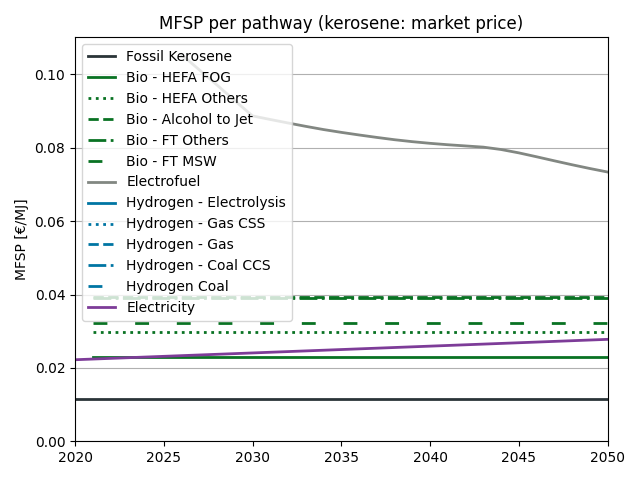

In [12]:
process.plot("energy_mfsp")

In [17]:
h2_reference = process.data["vector_outputs"][
    [
        "gas_ccs_h2_mean_mfsp_kg",
        "gas_h2_mean_mfsp_kg",
        "coal_ccs_h2_mean_mfsp_kg",
        "coal_h2_mean_mfsp_kg",
        "electrolysis_h2_mean_mfsp_kg",
        "liquefaction_h2_mean_mfsp_kg",
    ]
].loc[[2021, 2030, 2040, 2050]]
h2_reference

,gas_ccs_h2_mean_mfsp_kg,gas_h2_mean_mfsp_kg,coal_ccs_h2_mean_mfsp_kg,coal_h2_mean_mfsp_kg,electrolysis_h2_mean_mfsp_kg,liquefaction_h2_mean_mfsp_kg
2021,NaN,NaN,NaN,NaN,NaN,NaN
2030,NaN,NaN,NaN,NaN,NaN,NaN
2040,NaN,NaN,NaN,NaN,NaN,NaN
2050,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
biofuel_reference = process.data["vector_outputs"][
    [
        "biofuel_atj_mfsp",
        "biofuel_hefa_fog_mfsp",
        "biofuel_hefa_others_mfsp",
        "biofuel_ft_others_mfsp",
        "biofuel_ft_msw_mfsp",
    ]
].loc[[2021, 2030, 2040, 2050]]
biofuel_reference

,biofuel_atj_mfsp,biofuel_hefa_fog_mfsp,biofuel_hefa_others_mfsp,biofuel_ft_others_mfsp,biofuel_ft_msw_mfsp
2021,1.38668,0.815488,1.052703,1.378082,1.142423
2030,1.38668,0.815488,1.052703,1.378082,1.142423
2040,1.38668,0.815488,1.052703,1.378082,1.142423
2050,1.38668,0.815488,1.052703,1.378082,1.142423


In [24]:
efuel_reference = process.data["vector_outputs"][["electrofuel_mean_mfsp_litre"]]
efuel_reference

,electrofuel_mean_mfsp_litre
2000,NaN
2001,NaN
2002,NaN
2003,NaN
2004,NaN
2005,NaN
2006,NaN
2007,NaN
2008,NaN
2009,NaN
